<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_


## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
bank = pd.read_csv('../../data/bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1

In [2]:
# check the results of y
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [3]:
# Im going to take about 6 features and build two separate models.  
# Age, Job, Marital, education, contact, day of week.
# A correlation matrix or heat map is probably beneficial to finding useful features.
# This can be difficult with the amount of categorical features in the data.
# Once converted to dummie variables that will still be a computationally expensive process
# to compare all features.

# there was no formal eda behind my selection, I just wanted to use random features.  

In [4]:
features = ['age','job','marital','education','contact','day_of_week','y']

for feat in features:
    if feat != 'age':
        print bank[feat].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
cellular     2652
telephone    1467
Name: contact, dtype: int64
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64
0    3668
1     451
Name: y, dtype: int64


**Qualitative data analysis**  
So I have some unknown values in `education`, `marital` and `employment`.  We could make assumptions that the 39 unkown from `employment` are most likely in `admin` professions or that the 11 unknown in `marital` are most likely `married` (unfortunate that they are uncertain about it).

Personally, im going to drop the unknowns as I do not want to encorporate any addition bias into the data itself.  
- Going forward a more sound method of replacing unknowns is to build models to predict them using K Nearest neighbors, that way you are filling in an unknown using the most similar observations you have.

In [5]:
# creating the sub dataframe with only the features im using
bank_a =  bank[features]

# getting rid of unknowns
bank_a = bank_a[bank_a['education'] != 'unknown']
bank_a = bank_a[bank_a['job'] != 'unknown']
bank_a = bank_a[bank_a['marital'] != 'unknown']

My data is read to get dummied, but i'll wait until im about to model 


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the AUC by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [6]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  
*Model 1, using `age`, `job`, `education`, and `day_of_week`*

In [7]:
# md = ModelData.  Dummies ignores numeric columns such as age and y
bank_md1 = pd.get_dummies(bank_a[['age','job','education','day_of_week','y']], drop_first = True)


bank
# no hyper parameters for first model
LogReg1 = LogisticRegression()

# X and y features
X1 = bank_md1.drop('y', axis =1)
y1 = bank_md1['y']



# using train test split to cross val
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

# fit model
LogReg1.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.

*Seems like `job_entrepreneur` carries that largest coef.*

In [8]:
name = bank_md1.columns.drop('y')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,age,0.00762961
1,job_blue-collar,-0.426391
2,job_entrepreneur,-1.49324
3,job_housemaid,-0.444983
4,job_management,-0.426168
5,job_retired,0.608415
6,job_self-employed,-0.330618
7,job_services,-0.405957
8,job_student,0.904477
9,job_technician,-0.030407


**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [9]:
# predict with model
y_pred = LogReg1.predict(x_test1)

** Accuracy Score**

- Wow thats a pretty good score wouldn't you say?  Almost 90!  Remember the distribution of classes though.  In our entire dataset there are 3668 "No" and 451 "Yes" and a total of 4119 observations.  If we guessed that nobody was going to convert and therefore 'No' every time, we would be correct 89% of the time (according to out data).  That being said, this accuracy is barely better than baseline and such an insignificant difference could just be from how our train test split groupped the data.

In [10]:
metrics.accuracy_score(y_test1,y_pred)

0.898876404494382

**Confusion Matrix**

Looks like we have 880 True Negatives and 99 False Negatives.  That being said it looks like all our model is doing is predicting 'no' everytime.


In [11]:
metrics.confusion_matrix(y_test1,y_pred)

array([[880,   0],
       [ 99,   0]])

** ROC AUC**

The Area Under the ROC Curve is 0.5 which is completely wothless and our model gains no more insight that random guessing.  If we go back to the Accuracy score, we can now conclude that its minuscule improvement above the baseline is caused by our train test split.

In [12]:
metrics.roc_auc_score(y_test1,y_pred)

0.5

**Log Loss**

In [13]:
metrics.log_loss(y_test1,y_pred)

3.4926852534179349

### Model 2: Using `age`, `job`, `marital`, `education`, `contact` and `day_of_week` to predict If the bought or not.

In [14]:
# md = ModelData.  Dummies ignores numeric columns such as age and y
bank_md2 = pd.get_dummies(bank_a, drop_first = True)

# no hyper parameters for first model
LogReg2 = LogisticRegression()

# X and y features
X2 = bank_md2.drop('y', axis =1)
y2 = bank_md2['y']

# using train test split to cross val
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state =42)

# fit model
LogReg2.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred2 = LogReg2.predict(x_test2)

In [16]:
metrics.accuracy_score(y_test2,y_pred2)

0.898876404494382

In [17]:
metrics.confusion_matrix(y_test2,y_pred2)

array([[880,   0],
       [ 99,   0]])

In [18]:
metrics.roc_auc_score(y_test2,y_pred2)

0.5

In [19]:
metrics.log_loss(y_test2,y_pred2)

3.4926852534179349

None of the metrics really changed.  Looks like the features we have arn't very helpful...


### Is your model not performing very well?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for class 0 and the second is for class 1

In [20]:
y_pred_prob = LogReg2.predict_proba(x_test2)

y_pred_prob

array([[ 0.81582351,  0.18417649],
       [ 0.93532482,  0.06467518],
       [ 0.81732417,  0.18267583],
       ..., 
       [ 0.82688588,  0.17311412],
       [ 0.95322693,  0.04677307],
       [ 0.89817216,  0.10182784]])

**Visualize the distribution**

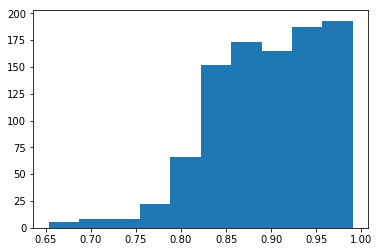

(array([ 193.,  187.,  165.,  173.,  152.,   66.,   22.,    8.,    8.,    5.]),
 array([ 0.00951752,  0.04323572,  0.07695391,  0.11067211,  0.1443903 ,
         0.1781085 ,  0.21182669,  0.24554489,  0.27926308,  0.31298128,
         0.34669947]),
 <a list of 10 Patch objects>)

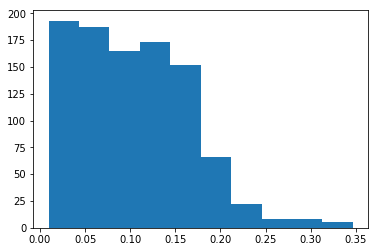

In [21]:
y_pred_prob_t = y_pred_prob.transpose()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob_t[0])
plt.show()
plt.hist(y_pred_prob_t[1])

** Calculate a new threshold and use it to convert predicted probabilities to output classes**

Lets try decreaseing the threshold to %20 predicted probability or higher.

In [22]:
y_pred3=[]
for prob in y_pred_prob_t[1]:
    if prob > .20:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
        
print len(y_pred3)
print len(y_test2)

979
979


In [23]:
y_pred3.count(1)  #Actually made some predictions

55

**Evaluate the model metrics now**

In [24]:
metrics.accuracy_score(y_test2,y_pred3)

0.86108273748723185

In [25]:
metrics.confusion_matrix(y_test2,y_pred3)

array([[834,  46],
       [ 90,   9]])

In [26]:
metrics.roc_auc_score(y_test2,y_pred3)

0.51931818181818179

In [27]:
metrics.log_loss(y_test2,y_pred3)

4.7980698377830864

## Step 4: Build a model using all of the features.

In [28]:
bank_all = pd.get_dummies(bank, drop_first = True)


In [29]:
# no hyper parameters for first model
LogReg3 = LogisticRegression(penalty='l1',C=0.01)

# X and y features
X3 = bank_all.drop('y', axis =1)
y3 = bank_all['y']

# using train test split to cross val
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state =42)

# fit model
LogReg3.fit(x_train3, y_train3)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred3 = LogReg3.predict(x_test3)

In [31]:
metrics.confusion_matrix(y_test3, y_pred3)

array([[895,  26],
       [ 68,  41]])

In [32]:
metrics.roc_auc_score(y_test3, y_pred3)

0.67395830220442476

## Bonus: Use Regularization to optimize your model.

In [33]:
# X and y features
X = bank_all.drop('y', axis =1)
y = bank_all['y']

# using train test split to cross val
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state =42)

cees = [0.01, 0.1, 1.0, 10, 100]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print roc," : ", c

0.673958302204  :  0.01
0.681503949636  :  0.1
0.693636753031  :  1.0
0.694179641196  :  10
0.694722529361  :  100


In [34]:
cees = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7 ,1.8, 1.9]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print roc," : ", c

0.701182400462  :  1.1
0.701182400462  :  1.2
0.696595244499  :  1.3
0.696595244499  :  1.4
0.696595244499  :  1.5
0.697138132664  :  1.6
0.697138132664  :  1.7
0.697681020829  :  1.8
0.697138132664  :  1.9
